# **3.5 Forma, função e ativação!** ⚙️
**Objetivo**:   implemente 3 novas funções de ativação na rede neural feita em Python puro nos vídeos da disciplina. Escreva brevemente sobre estas 3 funções de ativação, mostrando a equação delas e comentando a diferença com relação à função de ativação sigmoidal. Mostre que seu código funciona rodando alguns testes simples.
***

### **Introdução** 💡

Um neurônio, unidade básica de uma rede neural, recebe entradas ponderadas por pesos $w_k$ (inicializados de forma aleatória, mas depois atualizados por meio do algoritmo de <em>backpropagation</em>) e soma esses valores a um viés $b_k$ [Fórmula 1]. O resultado dessa soma é utilizado como argumento para uma função de ativação, que realiza uma transformação não linear da combinação linear $u_k$ obtida a partir dos inputs. Essa função, que pode ser representada na forma $\varphi(x)$ ou $S(x)$, é responsável pela captura da não linearidade dos dados e, de forma abstrata, representa o limiar de ativação do neurônio (ou seja, qual valor $u_k$ precisa assumir para que aquele determinado neurônio contribua para a formulação da previsão). Sem a utilização de funções de ativação, temos que o modelo se comportaria apenas como uma regressão linear, a qual devolveria como saída uma combinação linear dos dados de entrada. [2]

$$
u_k = \sum w_kx_i + b_k
$$

<p style="text-align: center;">
[Fórmula 1: Expressão matemática que representa a operação realizada em um neurônio]
</p>


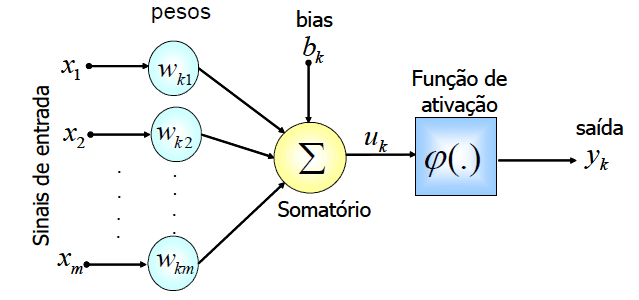

[Figura 1: Representação do funcionamento de um neurônio artificial]

Dentre uma das funções mais conhecidas e utilizadas, encontra-se a sigmoide: 
$$
S(x) = \frac{e^x}{e^x + 1}
$$

<p style="text-align: center;">
[Fórmula 2: Função Sigmoide]
</p>

$$
\frac{d}{dx} S(x) = S(x)(1 - (S(x)))
$$

<p style="text-align: center;">
[Fórmula 3: Derivada da Função sigmoide]
</p>

A sigmoide é uma função não linear caraterizada por estar contida no intervalo entre 0 e 1. É amplamente utilizada no contexto de redes neurais por ser facilmente diferenciável em todo seu intervalo (o que é especialmente útil para a aplicação do algoritmo de backpropagation), sendo que o cálculo apenas consiste na multiplicação da função sigmoide por 1 menos a própria função [Fórmula 3]. No entanto, essa pode não ser a melhor alternativa em todos as situações, dado que, por apresentar operações com exponencial, a sigmoide é uma função computacionalmente custosa. Além disso, apresenta um problema conhecido como "Vanishing Gradient" (do português, gradiente "desaparecido"), no qual a função de ativação leva a uma grande diminuição dos gradientes referentes aos primeiros vértices e, consequentemente, a rede leva mais tempo para convergir [6] - isso ocorre pois, a partir da aplicação da função sigmoide, os gradientes tornam-se próximos de 0. Em razão disso, como é possível notar pela tabela da referência 4, outras funções emergem como alternativas. 



Nesse contexto, esse notebook visa implementar 3 outras funções de ativação - tangente hiperbólica, Rectified Linear Unit (ReLU) e Softplus -  na rede neural construída em Python puro [1]. Para atestar se a implementação foi efetiva, os resultados serão comparados por meio da utilização do dataset didático "car_crashes" da biblioteca Seaborn.

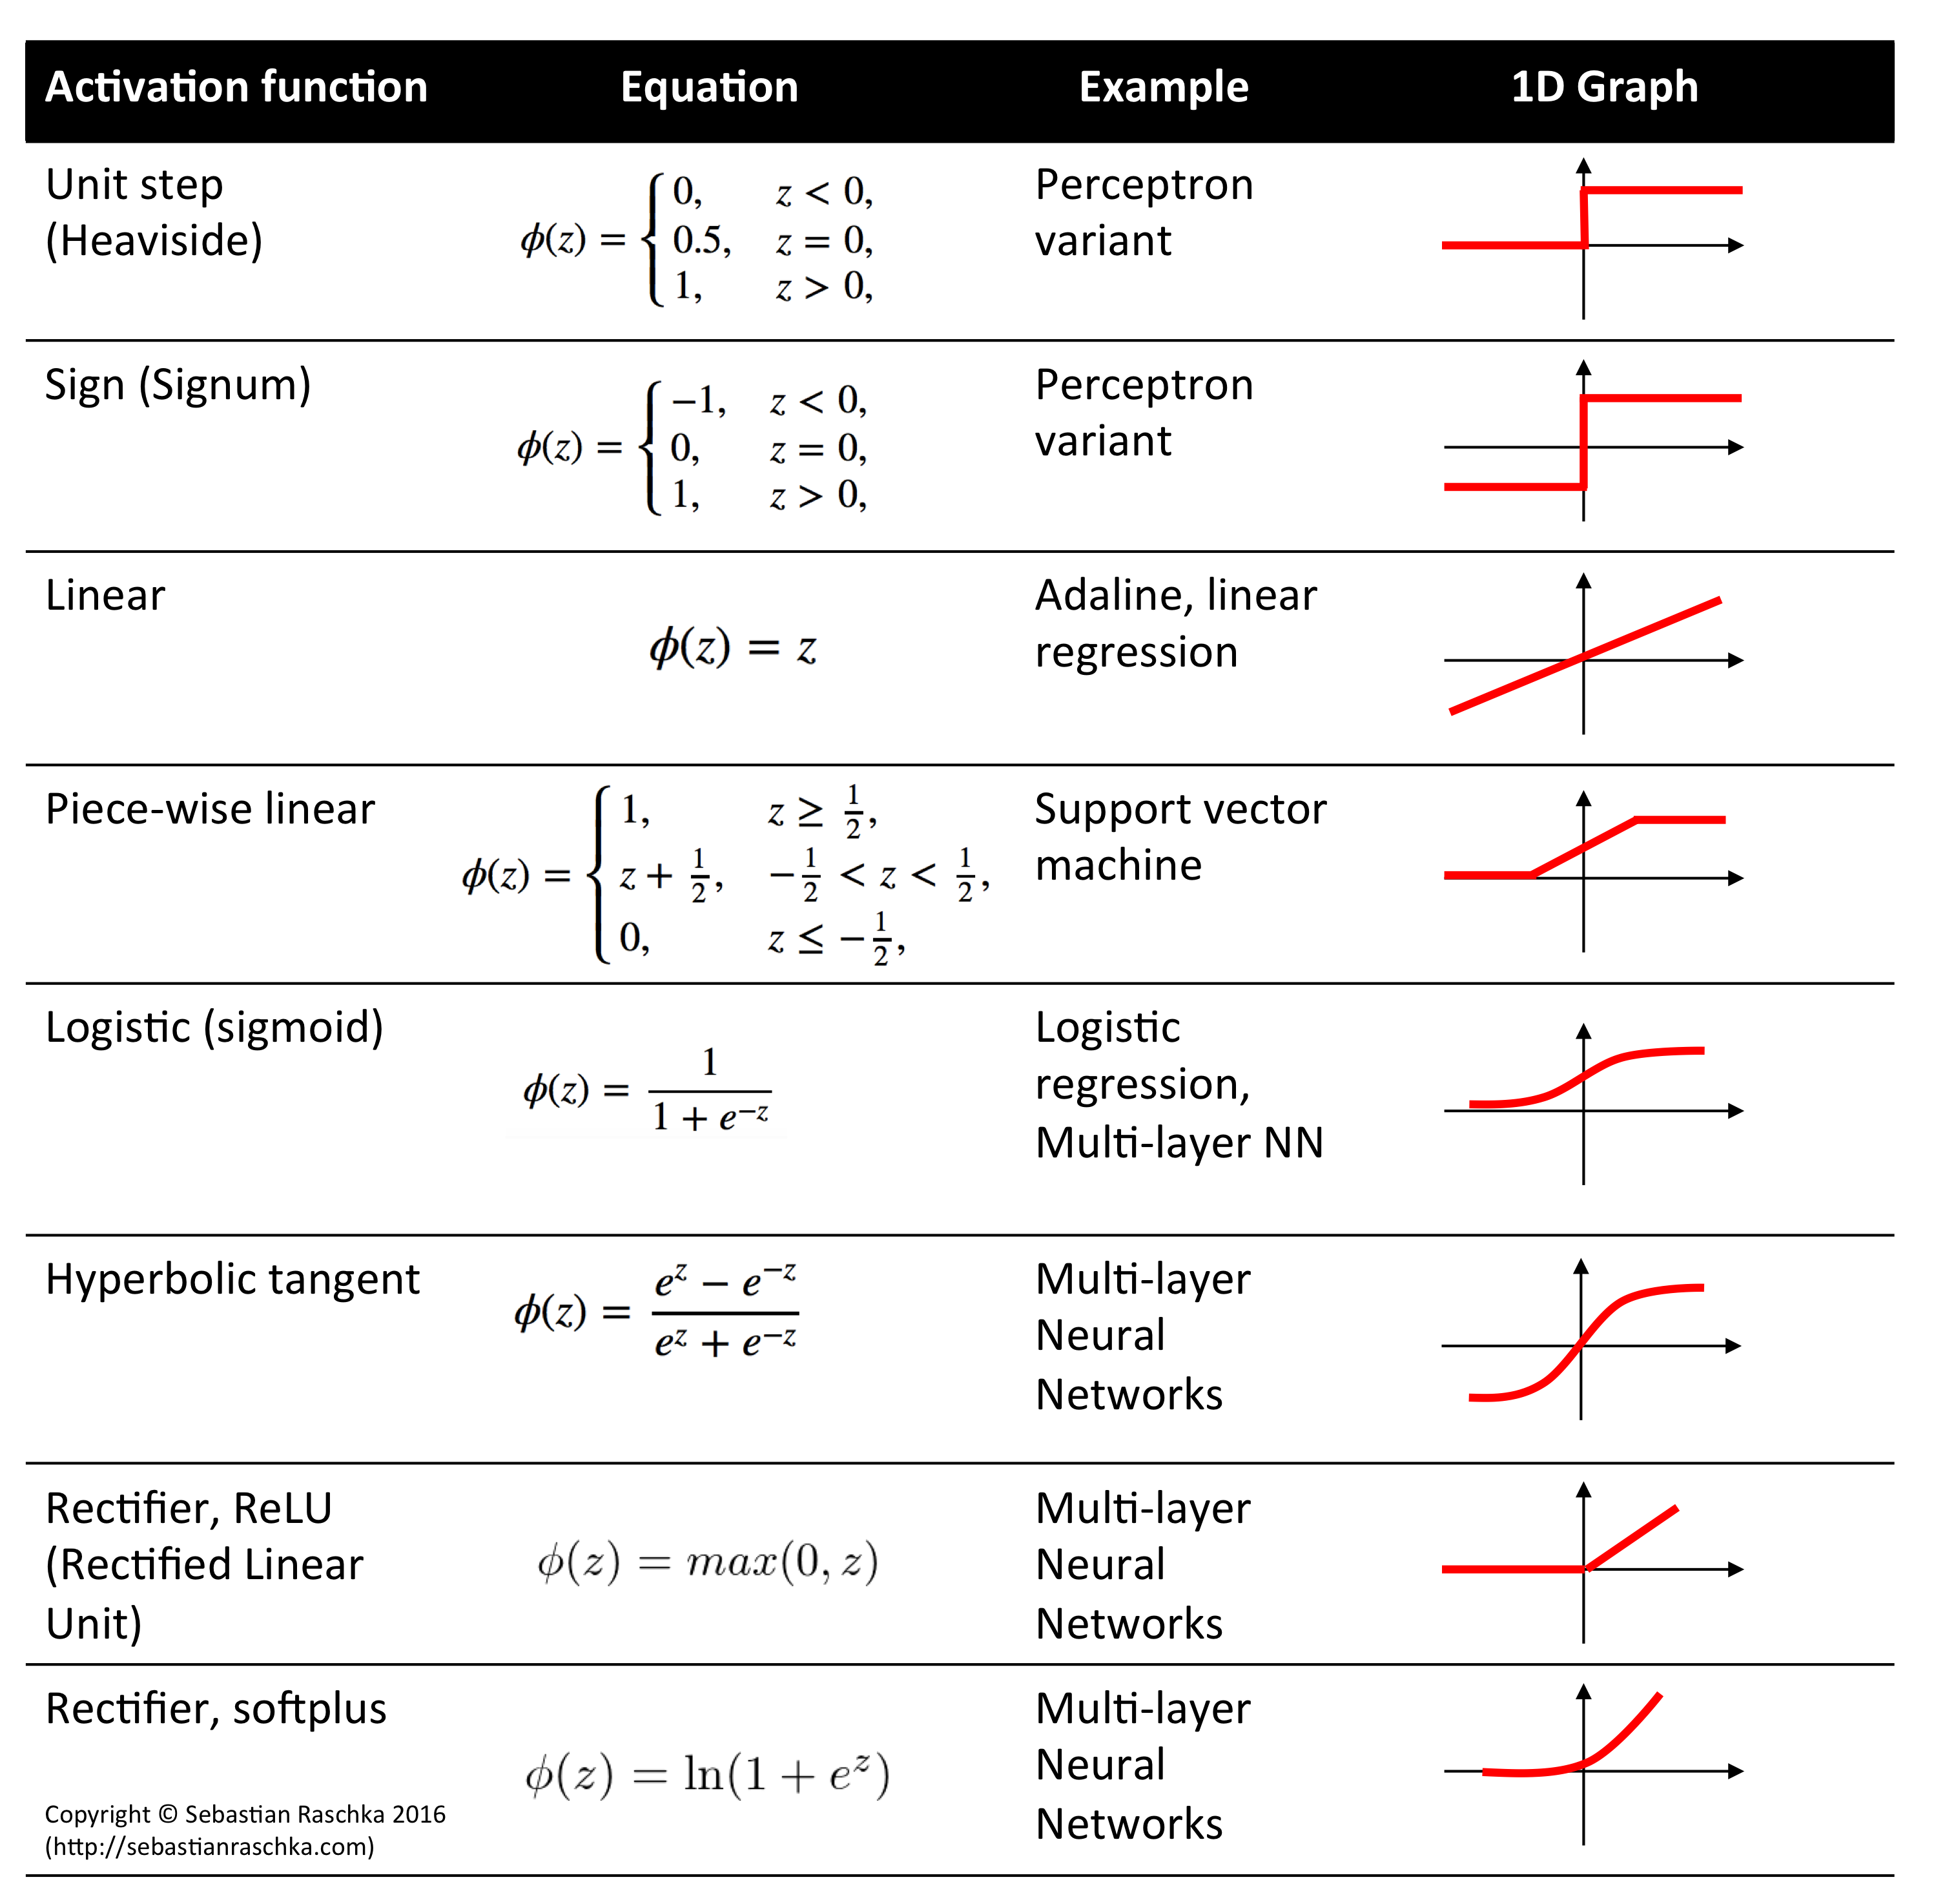 

[Figura 2: Tabela resumo das principais funções de ativação] [4]

### **Importação: bibliotecas e dataset 📚**

Na célula de código inicial, além das bibliotecas, o símbolo x será definido pela biblioteca sympy, o qual será utilizado em operações em todo o notebook.

In [67]:
from graphviz import Digraph
import math
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from sympy import symbols, diff
x = symbols('x') 

O dataset "car_crashes" da biblioteca Seaborn, contém dados referentes a acidentes de carros em diferentes estados dos Estados Unidos, levando em consideração fatores como velocidade, uso de bebidas alcoólicas e cobertura de seguro (todos expressos em percentual). A quantidade de acidentes (expressa em bilhões de milhas percorridas) as colunas de "speeding", "alcohol", "not_distracted" e "no_previous" serão utilizadas como features. [7][8]

In [68]:
df = sns.load_dataset("car_crashes").dropna()
display(df)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [69]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [70]:
X = np.array(df.loc[:, ["speeding", "alcohol", "not_distracted", "no_previous"]])
y = np.array(df["total"])

Para avaliar o resultado, o erro pertinente a última época do treinamento com cada função será utilizado.

### **Definição das funções de ativação 🎢**

##### **Tangente Hiperbólica** [9]

A função da tangente hiperbólica é definida como:

$$
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

In [71]:
def tanh(x):
    return (math.e ** x - math.e ** (-x))/ (math.e ** x + math.e ** (-x))

def derivada_tanh(x):
    return (1 - tanh(x)**2)

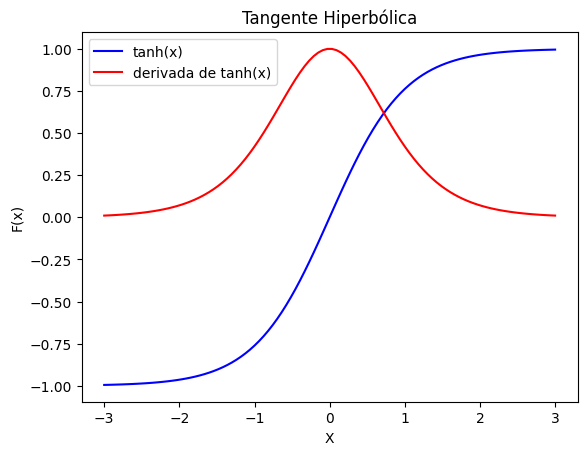

In [72]:
x_tanh= np.linspace(-3, 3, 100)
y_tanh = [tanh(xi) for xi in x_tanh]
y_derivada_tanh = [derivada_tanh(xi) for xi in x_tanh]

plt.plot(x_tanh, y_tanh, label="tanh(x)", color="blue")
plt.plot(x_tanh, y_derivada_tanh, label="derivada de tanh(x)", color="red")
plt.title("Tangente Hiperbólica")
plt.xlabel("X")
plt.ylabel("F(x)")
plt.legend()
plt.show()

* **Vantagens**: É uma função zero centrada e, portanto, pode apresentar gradientes positivos e negativos; Geralmente apresenta melhores resultados, em comparação com a função sigmoide.
* **Desvantagens**: Como a função sigmoide, apresenta operações com exponencial e, portanto, é computacionalmente custosa; Ainda apresenta o problema de "Vanishing Gradient".

##### **Função ReLU**

A função Rectified Linear Unit (ReLU, do português, unidade linear retificada) pode ser definida como:

$$
ReLU(x) = max(0, x)
$$

In [73]:
def relu(x):
    return(np.maximum(0,x))

def derivada_relu(x):
    if x <= 0:
        return 0
    else:
        return 1

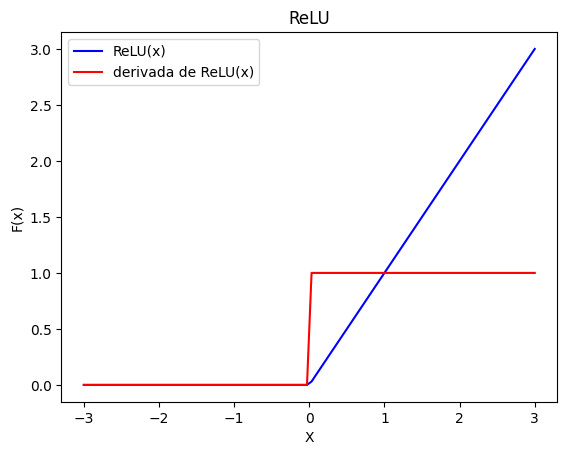

In [74]:
x_relu= np.linspace(-3, 3, 100)
y_relu = [relu(xi) for xi in x_relu]
y_derivada_relu = [derivada_relu(xi) for xi in x_relu]


plt.plot(x_relu, y_relu, label="ReLU(x)", color="blue")
plt.plot(x_tanh, y_derivada_relu, label="derivada de ReLU(x)", color="red")
plt.title("ReLU")
plt.xlabel("X")
plt.ylabel("F(x)")
plt.legend()
plt.show()

* **Vantagens**: Não apresenta o problema do "Vanishing Gradient", pois para valores positivos a derivada é constante e diferente de zero; Além disso, permite uma computação mais eficiente, pois zera a saída para valores negativos, reduzindo a ativação de neurônios desnecessários
* **Desvantagens**: Pode sofrer com o problema dos "neurônios mortos", quando a entrada é negativa e a derivada se torna zero, impedindo a atualização dos pesos durante o treinamento; Além disso, a função não é totalmente diferenciável em $x=0$, o que pode afetar certas implementações.

##### **Função Softplus** [11]

$$
F(x) = log(1 + e^x)
$$

In [75]:
def softplus(x):
    return np.log(1 + np.exp(x))

def derivada_softplus(x):
    return 1 / (1 + np.exp(-x))

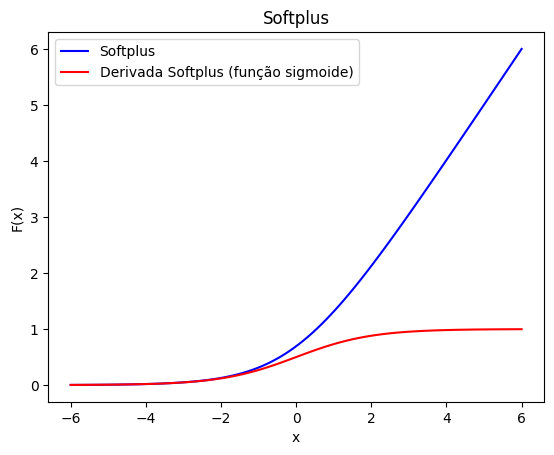

In [76]:
x_softplus = np.linspace(-6, 6, 100)
y_softplus = [softplus(xi) for xi in x_softplus]
y_derivada_softplus = [derivada_softplus(xi) for xi in x_softplus]

plt.plot(x_softplus, y_softplus, label="Softplus", color="blue")
plt.plot(x_softplus, y_derivada_softplus, label="Derivada Softplus (função sigmoide)", color="red")

plt.title("Softplus")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()

* **Vantagens**: Similar a função ReLU, apresenta como principal vantagem em relação a essa uma maior suavidade no cálculo do gradiente. Ademais, é capaz de lidar melhor com o problema do "Vanishing Gradient".
* **Desvantagens**: Apresenta maior custo computacional do que a função ReLU, por apresentar um comportamento mais complexo.

### **Aplicação na rede neural** 💻🧠

Em primeiro lugar, precisamos adicionar as operações referentes ao cálculo das funções de ativação na classe valor.

In [77]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data 
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado

    def exp_neg(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(-self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * (-data)
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def log(self):
        """Realiza a operação: log(self)"""
        progenitor = (self,)
        data = math.log(self.data)
        operador_mae = "log"
        resultado = Valor(data, progenitor, operador_mae)

        def propagar_log():
            # O gradiente correto de log(x) é 1/x
            self.grad += resultado.grad * (1 / self.data)

        resultado.propagar = propagar_log

        return resultado

    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)

    def tanh(self): 
        """ Realiza a operação: self.exp() - self.exp_neg())/ (self.exp() + self.exp_neg()"""
        return (self.exp() - self.exp_neg())/ (self.exp() + self.exp_neg())
    
    def relu(self):
        """Realiza a operação: np.maximum(0, self.data)"""
        progenitor = (self,)
        data = np.maximum(0, self.data)
        operador_mae = f"max(0, {self.data})"
        resultado = Valor(data, progenitor, operador_mae)

        def propagar_relu():
            # O gradiente é 1 quando self.data > 0, caso contrário é 0
            self.grad += resultado.grad * (1 if self.data > 0 else 0)

        resultado.propagar = propagar_relu

        return resultado
    
    def softplus(self):
        """Realiza a operação: (self.exp() + 1).log()"""
        return (self.exp() + 1).log()

    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

Para a implementação das novas funções de ativação, foi necessária a implementação de duas novas operações: log e exponencial negativa (isto é $e^{-x}$). Na função de log, em específico, foi preciso adicionar condições para evitar divisão por 0 ou cálculo de log de 0 (o que poderia gerar instabilidade numérica). 

Por outro lado, o procedimento para a adição da função ReLU foi diferente, visto que incluía também o método de propagação da função (O cálculo que deve ser feito para derivar a função ReLU ainda não estava definido).

Agora, precisamos criar quatro diferentes conjuntos de classes: sendo uma referente a cada função de ativação. Ao final de cada época, os gradientes serão armazenados em uma lista e esses resultados serão plotados, demonstrando a curva de aprendizado.

##### **Definição dos parâmetros da rede**

In [78]:
NUM_DADOS_DE_ENTRADA = 4
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [3, 3]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

NUM_EPOCAS = 100
TAXA_DE_APRENDIZADO = 10**(-5) 

##### **Função Sigmoide**

In [79]:
class Neuronio_sigmoide:
    def __init__(self, num_dados_entrada): # precisa conhecer a quant. dados de entrada (diferente para cada neurônio)
        # viés é inicialmente inicializado de forma aleatória
        self.vies = Valor(random.uniform(-1, 1))
        
        self.pesos = []
        for i in range(num_dados_entrada): # quant_pesos = quant_entradas
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):
        # dunder call é utilizado em casos de instancia(), ou seja, passar informação pelo neurônio
        # chamar a instância diretamente como uma função 

        assert len(x) == len(self.pesos) # a quant. de entradas deve ser igual a quant. de pesos
        
        soma = 0 
        for info_entrada, peso_interno in zip(x, self.pesos):
            # multiplica as entradas pelos pesos e soma esses valores
            soma += info_entrada * peso_interno
            
        soma += self.vies  # adição do viés a soma
        dado_de_saida = soma.sig() # utilização da função de ativição para a determinação de y^
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [80]:
class Camada_sigmoide:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            # inicializa uma determinada quantidade de neurõnios 
            neuronio = Neuronio_sigmoide(num_dados_entrada) 
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x): # resposta recebida na camada anterior 
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao) # propagação da informação 
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0] # retirada do valor único da lista 
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [81]:
class MLP_sigmoide:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        #num_neuronios_por_camada: é uma lista com a quant. de neurônios por camada
        
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada_sigmoide(num_neuronios_por_camada[i], percurso[i])
            #num_neuronios_por_camada: quant de neurônios na camada
            #percurso: num de entradas que chegaram na camada 
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        # executar a rede = passar informação por ela 
        for camada in self.camadas:
            x = camada(x)
        return x # armazena o valor da última camada
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [82]:
minha_mlp_sigmoide = MLP_sigmoide(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [83]:
resultado_loss_sigmoide = []

for epoca in range(NUM_EPOCAS): # sequência de treinamento de uma rede neural
    # forward pass -> etapa onde os dados (dados de entrada) passam pela rede neural e obtém-se uma previsão
    y_pred = []
    for exemplo in X:
        previsao = minha_mlp_sigmoide(exemplo)
        y_pred.append(previsao)

    # loss -> utiliza-se a previsão da rede e compara-se com os dados reais (soma dos resíduos quadrados)
    erros = []
    for yt, yp in zip(y, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad -> zerar os gradientes a cada época para não afetar a época seguinte
    for p in minha_mlp_sigmoide.parametros():
        p.grad = 0

    # backpropagation -> propagação dos gradientes locais (vértices folha até o vértice raiz)
    loss.propagar_tudo()

    # atualiza parâmetros -> atualizar os parâmetros internos com base nos gradientes locais para que a previsão se aproxime do valor previsto
    for p in minha_mlp_sigmoide.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    resultado_loss_sigmoide.append(loss.data)
    # mostra resultado -> mostrar o resultado para o usuário a cada época
    print(epoca, loss.data)

0 12558.482170854844
1 12555.436268472344
2 12552.405346011878
3 12549.389488955732
4 12546.388778569826
5 12543.403291943905
6 12540.433102033572
7 12537.478277704084
8 12534.538883775731
9 12531.614981070916
10 12528.706626462601
11 12525.813872924284
12 12522.936769581156
13 12520.075361762674
14 12517.229691056094
15 12514.39979536126
16 12511.585708946284
17 12508.787462504191
18 12506.005083210404
19 12503.23859478094
20 12500.488017531432
21 12497.753368436617
22 12495.034661190486
23 12492.33190626688
24 12489.645110980478
25 12486.974279548182
26 12484.31941315076
27 12481.680509994707
28 12479.05756537429
29 12476.450571733678
30 12473.859518729148
31 12471.284393291256
32 12468.725179686997
33 12466.18185958179
34 12463.654412101376
35 12461.142813893468
36 12458.6470391892
37 12456.167059864209
38 12453.70284549948
39 12451.254363441756
40 12448.821578863568
41 12446.404454822814
42 12444.002952321884
43 12441.617030366224
44 12439.24664602246
45 12436.891754475833
46 12434

##### **Função Tangente Hiperbólica**

In [84]:
class Neuronio_tanh:
    def __init__(self, num_dados_entrada): 
        
        self.vies = Valor(random.uniform(-1, 1))
        
        self.pesos = []
        for i in range(num_dados_entrada): 
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):

        assert len(x) == len(self.pesos) 
        
        soma = 0 
        for info_entrada, peso_interno in zip(x, self.pesos):

            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.tanh() 
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [85]:
class Camada_tanh:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):

            neuronio = Neuronio_tanh(num_dados_entrada) 
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x):  
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao) 
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0] 
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [86]:
class MLP_tanh:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada_tanh(num_neuronios_por_camada[i], percurso[i])
       
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):

        for camada in self.camadas:
            x = camada(x)
        return x 
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [87]:
minha_mlp_tanh = MLP_tanh(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [88]:
resultado_loss_tanh = []

for epoca in range(NUM_EPOCAS): 
    
    y_pred = []
    for exemplo in X:
        previsao = minha_mlp_tanh(exemplo)
        y_pred.append(previsao)


    erros = []
    for yt, yp in zip(y, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    for p in minha_mlp_tanh.parametros():
        p.grad = 0

    loss.propagar_tudo()

    for p in minha_mlp_tanh.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    resultado_loss_tanh.append(loss.data)
    print(epoca, loss.data)

0 13314.89360867815
1 13123.573488835147
2 12985.221577029522
3 12887.878858403488
4 12813.752250950407
5 12752.947479473012
6 12700.394668703322
7 12653.931986306698
8 12612.4118971753
9 12575.077990298269
10 12541.362125381564
11 12510.807259899124
12 12483.032572263139
13 12457.714765641638
14 12434.57638386717
15 12413.37759997902
16 12393.909992353629
17 12375.991624632734
18 12359.463071647304
19 12344.184171425515
20 12330.031347188871
21 12316.89537929722
22 12304.679533038441
23 12293.297969441184
24 12282.67438390122
25 12272.740831310677
26 12263.436706729848
27 12254.707857981797
28 12246.505811602654
29 12238.787097040811
30 12231.512656425055
31 12224.64732900889
32 12218.159400797456
33 12212.020211024148
34 12206.203808147628
35 12200.686648929304
36 12195.44733494688
37 12190.466381613222
38 12185.726015406797
39 12181.209995585757
40 12176.903457157521
41 12172.792772313656
42 12168.865427922578
43 12165.109917003874
44 12161.515642395616
45 12158.07283107257
46 12154

##### **Função ReLU**

In [89]:
class Neuronio_relu:
    def __init__(self, num_dados_entrada): 
        
        self.vies = Valor(random.uniform(-1, 1))
        
        self.pesos = []
        for i in range(num_dados_entrada): 
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):

        assert len(x) == len(self.pesos) 
        
        soma = 0 
        for info_entrada, peso_interno in zip(x, self.pesos):

            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.relu() 
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [90]:
class Camada_relu:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):

            neuronio = Neuronio_relu(num_dados_entrada) 
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x):  
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao) 
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0] 
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [91]:
class MLP_relu:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada_relu(num_neuronios_por_camada[i], percurso[i])
       
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):

        for camada in self.camadas:
            x = camada(x)
        return x 
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [92]:
minha_mlp_relu = MLP_relu(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [93]:
resultado_loss_relu = []

for epoca in range(NUM_EPOCAS): 
    
    y_pred = []
    for exemplo in X:
        previsao = minha_mlp_relu(exemplo)
        y_pred.append(previsao)


    erros = []
    for yt, yp in zip(y, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    for p in minha_mlp_relu.parametros():
        p.grad = 0

    loss.propagar_tudo()

    for p in minha_mlp_relu.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    resultado_loss_relu.append(loss.data)
    print(epoca, loss.data)

0 11927.726316597378
1 5797.896059021295
2 1709.6934127749637
3 543.5689204335434
4 491.0059401751114
5 482.6071032557847
6 474.7155523878967
7 467.1125327371891
8 459.7479636889898
9 452.49214758984266
10 445.5206587587813
11 438.85457606392356
12 432.41104999978415
13 426.17876557296233
14 420.14716210781376
15 414.306354573845
16 408.64708204633644
17 403.1606598473135
18 397.8389361359284
19 392.6742523630353
20 387.6594072011473
21 382.78762359471517
22 378.0525186176186
23 373.4480758602332
24 368.9686200995479
25 364.5658179635256
26 360.16279069979265
27 355.54548447876226
28 350.17294194103516
29 345.0858001199278
30 340.39215100669276
31 336.22611125863665
32 332.2129206296805
33 328.4089059775996
34 324.421284717672
35 320.6260124677868
36 316.72133080431956
37 313.44720268371657
38 310.4378798237217
39 307.5179937154963
40 304.90247299519075
41 302.02163531352846
42 299.4042084094969
43 296.79269282887543
44 294.1036450350152
45 291.77294901031695
46 289.31437705393387
47 2

##### **Função Softplus**

In [94]:
class Neuronio_softplus:
    def __init__(self, num_dados_entrada): 
        
        self.vies = Valor(random.uniform(-1, 1))
        
        self.pesos = []
        for i in range(num_dados_entrada): 
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):

        assert len(x) == len(self.pesos) 
        
        soma = 0 
        for info_entrada, peso_interno in zip(x, self.pesos):

            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.softplus() 
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [95]:
class Camada_softplus:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):

            neuronio = Neuronio_relu(num_dados_entrada) 
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x):  
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao) 
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0] 
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [96]:
class MLP_softplus:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada_softplus(num_neuronios_por_camada[i], percurso[i])
       
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):

        for camada in self.camadas:
            x = camada(x)
        return x 
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [97]:
minha_mlp_softplus = MLP_softplus(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [98]:
resultado_loss_softplus = []

for epoca in range(NUM_EPOCAS): 
    
    y_pred = []
    for exemplo in X:
        previsao = minha_mlp_softplus(exemplo)
        y_pred.append(previsao)


    erros = []
    for yt, yp in zip(y, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    for p in minha_mlp_softplus.parametros():
        p.grad = 0

    loss.propagar_tudo()

    for p in minha_mlp_softplus.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    resultado_loss_softplus.append(loss.data)
    print(epoca, loss.data)

0 11376.599455316527
1 10901.063502464476
2 10189.530191681271
3 8894.272566643915
4 6738.706014747788
5 3927.2386198012136
6 1355.733678696172
7 277.1299099771294
8 175.52354006842984
9 173.76105348335773
10 172.43232354946838
11 171.12572042294
12 169.8405405361272
13 168.57624642798726
14 167.33231865172726
15 166.1082551155708
16 164.90357035947667
17 163.71779487154816
18 162.55047443769752
19 161.40116952278802
20 160.26945468149626
21 159.15491799725186
22 158.0571605477048
23 156.9757958952815
24 155.91044960146525
25 154.86075876352822
26 153.8263715725201
27 152.80694689138284
28 151.80215385213813
29 150.81167147115093
30 149.83518828153063
31 148.87240198179222
32 147.9230190999445
33 146.98675467222193
34 146.0633319357267
35 145.1524820342805
36 144.25394373683483
37 143.36746316781705
38 142.49279354882685
39 141.6296949511367
40 140.77793405846543
41 139.93728393953987
42 139.10752382997242
43 138.28843892301683
44 137.4798201687807
45 136.6814640815038
46 135.893172554

##### **Plot dos resultados**

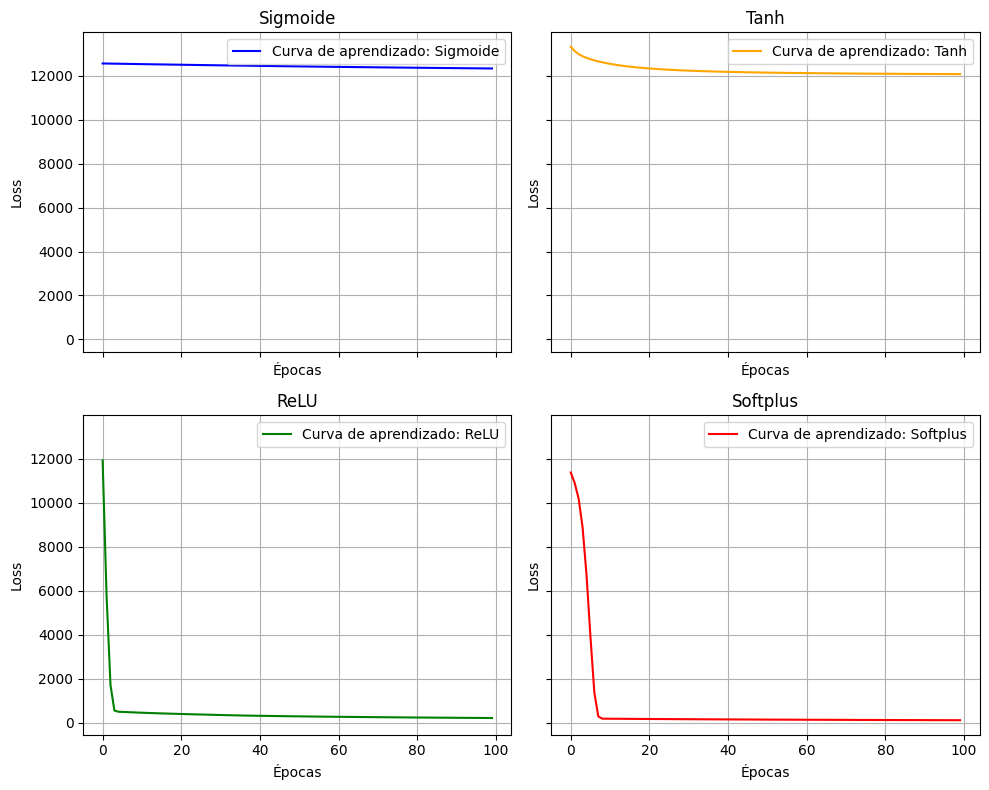

In [99]:
import matplotlib.pyplot as plt

X_plot = list(range(0, 100, 1))

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

axes[0, 0].plot(X_plot, resultado_loss_sigmoide, label="Curva de aprendizado: Sigmoide", color="blue")
axes[0, 1].plot(X_plot, resultado_loss_tanh, label="Curva de aprendizado: Tanh", color="orange")
axes[1, 0].plot(X_plot, resultado_loss_relu, label="Curva de aprendizado: ReLU", color="green")
axes[1, 1].plot(X_plot, resultado_loss_softplus, label="Curva de aprendizado: Softplus", color="red")

axes[0, 0].set_title("Sigmoide")
axes[0, 1].set_title("Tanh")
axes[1, 0].set_title("ReLU")
axes[1, 1].set_title("Softplus")

for ax in axes.flat:
    ax.set_xlabel("Épocas")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Pelos resultados, é possível dizer que as funções de ativação ReLU e softplus - as quais, cabe ressaltar - possuem comportamento semelhante - apresentam desempenho satisfatório, sendo que a função de perda diminui significamente com o passar das épocas. Como principal diferença, é possível observar que a softplus convergiu mais rapidamente (nas primeiras 10 épocas), enquanto o resultado da ReLU continou diminuindo ao longo do tempo. 

Por outro lado, as funções sigmoide e tangente hiperbólica apresentaram um desempenho ruim, sendo que, mesmo após 100 épocas, a função loss não apresentou diminuição significativa. Esse resultado, considerando a natureza das funções, pode estar relacionado com o fenômeno de "Vanishing Gradient", mencionado anteriormente. 

### **Conclusão** 🧪

Ao final do notebook, foi possível concluir que a implementação de outras funções de ativação na MLP feita em Python puro foi bem-sucedida. Apesar dos resultados não tão satisfatórios das funções sigmoide e tangente hiperbólica - o que pode estar ligado com fenômenos característicos de tais funções, como "Vanishing Gradient" -, as funções ReLU e Softplus apresentaram resultados interessantes, com diminuição significativa da função de perda. Ao longo do processo, ademais, consegui aprender melhor sobre o funcionamento da rede e o algoritmo de backpropagation. 

### **Referências 🗃️**

[1] Referência Principal (construção da rede neural em Python puro): Andrej Karpathy. The spelled-out intro to neural networks and backpropagation: building micrograd (2022). https://www.youtube.com/watch?v=VMj-3S1tku0

[2] VIVEKPANDIAN. Types of Activation Functions in Neural Network. Disponível em: <https://medium.com/analytics-vidhya/https-medium-com-types-of-activation-functions-in-neural-network-504ddba28e35>. Acesso em: 29 mar. 2025.

[3] Soares, Pablo & da Silva, José. (2011). Aplicação de Redes Neurais Artificiais em Conjunto com o Método Vetorial da Propagação de Feixes na Análise de um Acoplador Direcional Baseado em Fibra Ótica. Revista Brasileira de Computação Aplicada. 3. 10.5335/rbca.2013.1803. 

[4] RASCHKA, Sebastian. Activation Functions for Artificial Neural Networks. Sebastian Raschka, PhD. Disponível em: <https://sebastianraschka.com/faq/docs/activation-functions.html>. Acesso em: 29 mar. 2025.

[5] SINGH, Santosh. Activation functions and their advantages & disadvantages. Disponível em: <https://medium.com/@santosh76792/activation-functions-and-their-advantages-disadvantages-d5eaa1717805>. Acesso em: 29 mar. 2025.

[6] AMANATULLAH. Vanishing Gradient Problem in Deep Learning: Understanding, Intuition, and Solutions. Disponível em: <https://medium.com/@amanatulla1606/vanishing-gradient-problem-in-deep-learning-understanding-intuition-and-solutions-da90ef4ecb54>. Acesso em: 31 mar. 2025.

[7] UMAR, Aqsa. Seaborn. Disponível em: <https://medium.com/@Aqsaumar48/seaborn-6ceda1a3d14a>. Acesso em: 31 mar. 2025.

[8] ŞENOL, Ömer. Seaborn:Datasets’s Explorations. Disponível em: <https://senolomer0.medium.com/seaborn-datasetss-explorations-39d080e55e55>. Acesso em: 31 mar. 2025.

[9] Tangente hiperbólica. In: Wikipédia, a enciclopédia livre. [s.l.: s.n.], 2023. Disponível em: <https://pt.wikipedia.org/w/index.php?title=Tangente_hiperb%C3%B3lica&oldid=65155230>. Acesso em: 31 mar. 2025.

[10] PAPP, Gergely. ReLU derivative in backpropagation. Disponível em: <https://stackoverflow.com/q/42042561>. Acesso em: 31 mar. 2025.

[11] Softplus. In: Wikipedia. [s.l.: s.n.], 2024. Disponível em: <https://en.wikipedia.org/w/index.php?title=Softplus&oldid=1249895129>. Acesso em: 31 mar. 2025.

